# Ramen Analysis

### Import Libraries

In [94]:
#Visualization of the different relations of and reviews of various ramen brands
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
#Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

%matplotlib inline

### Load in Data for Preprocessing

In [239]:
#Load in dataframe
df = pd.read_csv("ramen-ratings.csv")


#Show first 10 rows
df.head(10) 
#Remove unneeded columns
df = df.drop(columns = ["Top Ten"], axis = 1)
#Check for empty/invalid values
df.isna().sum()
df = df.dropna(subset=['Style'])
df = df[df['Stars'] != 'Unrated']
df = df[df['Style']!= 'Bar']
df = df[df['Style'] != 'Can']
#Show first 10 rows
print(df.shape)
df.head(10)

(2573, 6)


,Review #,Brand,Variety,Style,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5


### Most Popular Brands

In [231]:
brands = pd.Series(df['Brand'].value_counts()[:10].index.tolist())
print(brands)

0           Nissin
1         Nongshim
2         Maruchan
3             Mama
4            Paldo
5            Myojo
6          Indomie
7    Samyang Foods
8           Ottogi
9     Vina Acecook
dtype: object


### Statistics regarding Ramen Ratings(Stars)

In [158]:
star_stats = df['Stars'].astype(float)
star_stats.describe()

count    2575.000000
mean        3.654893
std         1.015641
min         0.000000
25%         3.250000
50%         3.750000
75%         4.250000
max         5.000000
Name: Stars, dtype: float64

### Frequency of Stars, Countries and Styles using Bar graphs and Histograms

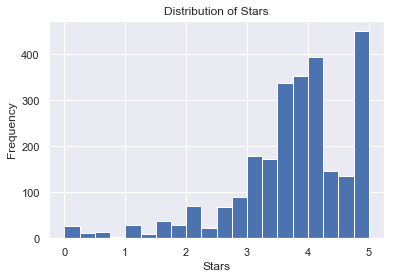

In [183]:
#Histogram
sns.set()
x = star_stats.hist(bins = 20)
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.title("Distribution of Stars")
plt.show()


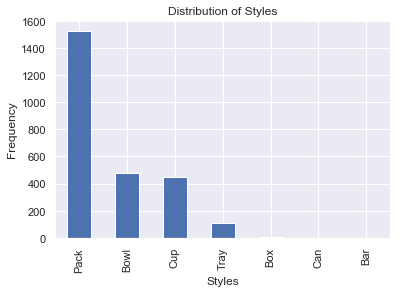

In [189]:
sns.set()
fig, ax1 = plt.subplots()
plt.title("Distribution of Styles")
plt.xlabel('Styles')
plt.ylabel('Frequency')
df['Style'].value_counts().plot(ax=ax1, kind='bar')

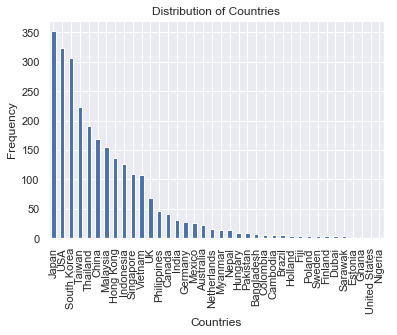

In [217]:
sns.set()
fig, ax = plt.subplots()
plt.title("Distribution of Countries")
plt.xlabel('Countries')
plt.ylabel('Frequency')
df['Country'].value_counts().plot(ax=ax, kind='bar')

### Top 50 Highest Reviewed Ramens according to stars

In [236]:
df['Stars'] = df['Stars'].astype(float)
top_50 = df.groupby('Brand')['Stars'].mean()
top_50 = top_10.sort_values(ascending = False) 
top_50.head(50)

Brand
Foodmon                   5.000000
Prima Taste               5.000000
ORee Garden               5.000000
The Bridge                5.000000
Seven & I                 5.000000
MyOri                     5.000000
Higashi                   5.000000
Tao Kae Noi               5.000000
Daddy                     5.000000
Daifuku                   5.000000
ChoripDong                5.000000
Nyor Nyar                 5.000000
The Ramen Rater Select    5.000000
Komforte Chockolates      5.000000
Kimura                    5.000000
Kiki Noodle               5.000000
Plats Du Chef             5.000000
Peyang                    5.000000
Patanjali                 5.000000
Torishi                   5.000000
Jackpot Teriyaki          5.000000
Takamori                  5.000000
Song Hak                  5.000000
Prima                     5.000000
MyKuali                   4.947917
CarJEN                    4.928571
TTL                       4.916667
Nanyang Chef              4.875000
Mom's Dry Nood

### Visual Representation of Frequency of Styles with a Pie Chart

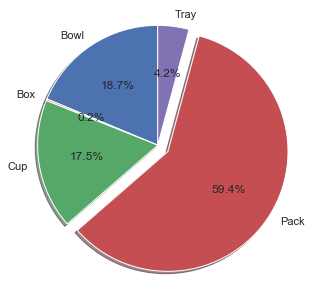

In [259]:
##Find the count of each style
df.groupby('Style')['Style'].count()
labels = 'Bowl', 'Box', 'Cup', 'Pack', 'Tray'
sizes = [481,6,450,1528,108]
explode = (0, 0, 0, 0.1, 0)  
fig1, ax1 = plt.subplots(1,1, figsize= (5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Preprocessing Variety Column

In [83]:
#Make a copy and process Variety Column
variety = df
#Remove unneeded columns for now
variety = variety.drop(columns = ["Review #", "Brand", "Style", "Country"], axis = 1)
#Remove punctuation
variety['Variety_Processed'] = variety['Variety'].map(lambda x: re.sub('[,\.!?]', '', x))
#Convert the titles to lowercase
variety['Variety_Processed'] = variety['Variety_Processed'].map(lambda x: x.lower())
#Show processed rows
variety.head(10)

,Variety,Stars,Variety_Processed
0,T's Restaurant Tantanmen,3.75,t's restaurant tantanmen
1,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,1,noodles spicy hot sesame spicy hot sesame guan...
2,Cup Noodles Chicken Vegetable,2.25,cup noodles chicken vegetable
3,GGE Ramen Snack Tomato Flavor,2.75,gge ramen snack tomato flavor
4,Singapore Curry,3.75,singapore curry
5,Kimchi song Song Ramen,4.75,kimchi song song ramen
6,Spice Deli Tantan Men With Cilantro,4,spice deli tantan men with cilantro
7,Nabeyaki Kitsune Udon,3.75,nabeyaki kitsune udon
8,Hokkaido Soy Sauce Ramen,0.25,hokkaido soy sauce ramen
9,The Original Spicy Stir-Fried Noodles,2.5,the original spicy stir-fried noodles


### Basic Analysis for the frequency of words used within the Ramen Variety description

In [76]:
# Join the different processed titles together.
long_string = ','.join(list(variety['Variety_Processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)

## Show Wordcloud

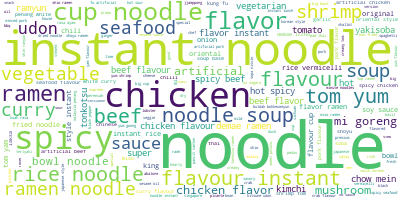

In [77]:
wordcloud.to_image()

### Plotting Top 10 Most Common Words with Matplotlib and Natural Language Processing Toolkit

In [78]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 Most Common Words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.show()


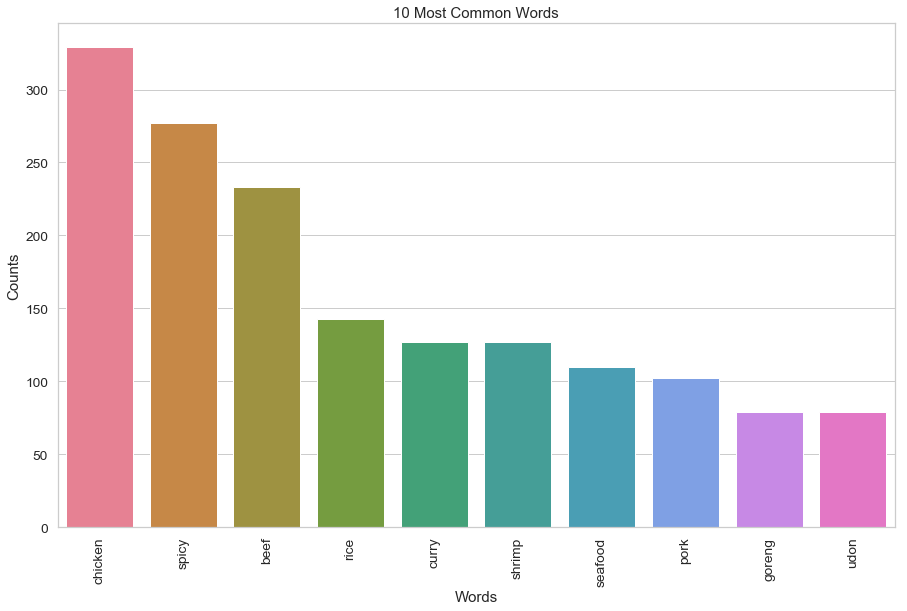

In [65]:
#Set stop words
stopwords = nltk.corpus.stopwords.words("english")
#Customize stopwords
new_stop_words = ['noodles', 'noodle', 'ramen', 'flavor', 'cup', 'flavour', 'instant', 'soup','artificial','mi','sauce','hot','tom','bowl','style','yum']
stopwords.extend(new_stop_words)
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words = stopwords)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(variety['Variety_Processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

### Differentiate between varieties of noodles by using Scikit-Learn

In [79]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
chicken rice vegetable vermicelli mushroom vegetarian pork udon pho flavored

Topic #1:
beef spicy shrimp yakisoba sour rasa big chili new creamy

Topic #2:
pork spicy chow mein tomato yam kung chilli fu thai

Topic #3:
curry seafood oriental sesame spicy penang crab fried soy original

Topic #4:
goreng demae tonkotsu ramyun miso kimchi shoyu korean perisa iccho
